In [300]:
import pandas as pd
import numpy as np
import string
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import cv2
from PIL import Image
from scipy import misc
from skimage import io

In [301]:
data_path = "C:/Users/varun/Downloads/samples"
labels = []
for img_filename in os.listdir(data_path):
    if img_filename.endswith(".png") or img_filename.endswith(".jpg"):
        label = img_filename#.split('.')[0]
        labels.append(label)

In [302]:
n_samples=len(labels)

In [303]:
labels

['226md.png',
 '22d5n.png',
 '2356g.png',
 '23mdg.png',
 '23n88.png',
 '243mm.png',
 '244e2.png',
 '245y5.png',
 '24f6w.png',
 '24pew.png',
 '25257.png',
 '253dc.png',
 '25egp.png',
 '25m6p.png',
 '25p2m.png',
 '25w53.png',
 '264m5.png',
 '268g2.png',
 '28348.png',
 '28x47.png',
 '2b827.png',
 '2bg48.png',
 '2cegf.png',
 '2cg58.png',
 '2cgyx.png',
 '2en7g.png',
 '2enf4.png',
 '2fxgd.png',
 '2g783.png',
 '2g7nm.png',
 '2gyb6.png',
 '2mg87.png',
 '2mpnn.png',
 '2n73f.png',
 '2nbc5.jpg',
 '2nbcx.png',
 '2nf26.png',
 '2npg6.png',
 '2nx38.png',
 '2p2y8.png',
 '2pfpn.png',
 '2w4y7.png',
 '2wc38.png',
 '2wx73.png',
 '2x7bm.png',
 '2xc2n.png',
 '2ycn8.png',
 '2yggg.png',
 '325fb.png',
 '32cnn.png',
 '32dnn.png',
 '33b22.png',
 '33f7m.png',
 '33n73.png',
 '33ng4.png',
 '33p4e.png',
 '34b84.png',
 '34fxm.png',
 '34pcn.png',
 '368y5.png',
 '36bc2.png',
 '36nx4.png',
 '36w25.png',
 '373gb.png',
 '377xx.png',
 '378e5.png',
 '37d52.png',
 '37ep6.png',
 '387g2.png',
 '38n57.png',
 '3b4we.png',
 '3bd8

In [304]:
cropped_images=[]
cropped_images_labels=[]
for i in range(n_samples):
    #image=cv2.imread('samples/'+str(labels[i]))
    image=io.imread('samples/'+str(labels[i]), as_gray=True)
    crop_image_1=image[0:50, 30:50]
    crop_image_2=image[0:50, 50:70]
    crop_image_3=image[0:50, 70:90]
    crop_image_4=image[0:50, 95:115]
    crop_image_5=image[0:50, 115:135]
    crop_image_1_label=labels[i][0]
    crop_image_2_label=labels[i][1]
    crop_image_3_label=labels[i][2]
    crop_image_4_label=labels[i][3]
    crop_image_5_label=labels[i][4]
    cropped_images.append(crop_image_1)
    cropped_images.append(crop_image_2)
    cropped_images.append(crop_image_3)
    cropped_images.append(crop_image_4)
    cropped_images.append(crop_image_5)
    cropped_images_labels.append(crop_image_1_label)
    cropped_images_labels.append(crop_image_2_label)
    cropped_images_labels.append(crop_image_3_label)
    cropped_images_labels.append(crop_image_4_label)
    cropped_images_labels.append(crop_image_5_label)

In [305]:
len(cropped_images)

5325

In [306]:
len(cropped_images_labels)

5325

In [307]:
print(cropped_images_labels[10],cropped_images_labels[11],cropped_images_labels[12],cropped_images_labels[13],cropped_images_labels[14])

2 3 5 6 g


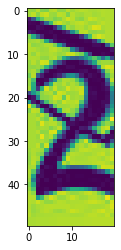

In [308]:
plt.imshow(cropped_images[10])

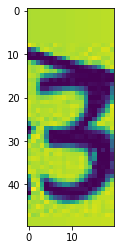

In [309]:
plt.imshow(cropped_images[11])

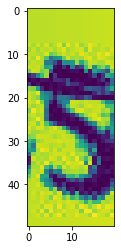

In [310]:
plt.imshow(cropped_images[12])

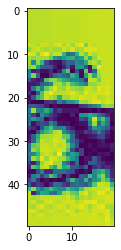

In [311]:
plt.imshow(cropped_images[13])

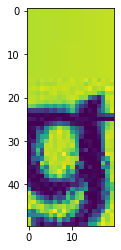

In [312]:
plt.imshow(cropped_images[14])

In [313]:
set(cropped_images_labels)

{'2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'm',
 'n',
 'p',
 'w',
 'x',
 'y'}

In [314]:
for image in cropped_images:
    image=image/255.0

In [315]:
image.size

1000

In [316]:
image.shape

(50, 20)

In [317]:
label_characters=string.ascii_lowercase+str(string.digits)
len(label_characters)

36

In [318]:
cropped_images_tensor=tf.convert_to_tensor(cropped_images)

In [319]:
cropped_images_tensor.shape

TensorShape([5325, 50, 20])

In [320]:
inp_shape=(50,20,1)

In [321]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=inp_shape),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  #tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(36, activation='softmax')
])

In [322]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [323]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 48, 18, 64)        640       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 24, 9, 64)         0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 22, 7, 64)         36928     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 11, 3, 64)         0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 2112)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 128)               270464    
_________________________________________________________________
dense_25 (Dense)             (None, 36)              

In [324]:
for n, i in enumerate(cropped_images_labels):
    if i == '2':
        cropped_images_labels[n] = 2
    if i == '3':
        cropped_images_labels[n] = 3
    if i == '4':
        cropped_images_labels[n] = 4
    if i == '5':
        cropped_images_labels[n] = 5
    if i == '6':
        cropped_images_labels[n] = 6
    if i == '7':
        cropped_images_labels[n] = 7
    if i == '8':
        cropped_images_labels[n] = 8
    if i == 'b':
        cropped_images_labels[n] = 10
    if i == 'c':
        cropped_images_labels[n] = 11
    if i == 'd':
        cropped_images_labels[n] = 12
    if i == 'e':
        cropped_images_labels[n] = 13
    if i == 'f':
        cropped_images_labels[n] = 14
    if i == 'g':
        cropped_images_labels[n] = 15
    if i == 'm':
        cropped_images_labels[n] = 16
    if i == 'n':
        cropped_images_labels[n] = 17
    if i == 'p':
        cropped_images_labels[n] = 18
    if i == 'w':
        cropped_images_labels[n] = 19
    if i == 'x':
        cropped_images_labels[n] = 0
    if i == 'y':
        cropped_images_labels[n] = 1

In [325]:
cropped_images_labels=np.array(cropped_images_labels)

In [326]:
cropped_images_tensor=np.array(cropped_images_tensor)

In [327]:
cropped_images_tensor=cropped_images_tensor.reshape((5325,50,20,1))

In [328]:
cropped_images_tensor.shape

(5325, 50, 20, 1)

In [329]:
history = model.fit(cropped_images_tensor, cropped_images_labels, epochs=30, batch_size=32)

Train on 5325 samples
Epoch 1/30
5325/5325 [==============================] - 10s 2ms/sample - loss: 1.6546 - accuracy: 0.5532
Epoch 2/30
5325/5325 [==============================] - 9s 2ms/sample - loss: 0.6282 - accuracy: 0.8308
Epoch 3/30
5325/5325 [==============================] - 9s 2ms/sample - loss: 0.4475 - accuracy: 0.8787
Epoch 4/30
5325/5325 [==============================] - 9s 2ms/sample - loss: 0.3396 - accuracy: 0.9042
Epoch 5/30
5325/5325 [==============================] - 9s 2ms/sample - loss: 0.2867 - accuracy: 0.9140
Epoch 6/30
5325/5325 [==============================] - 9s 2ms/sample - loss: 0.2365 - accuracy: 0.9294
Epoch 7/30
5325/5325 [==============================] - 9s 2ms/sample - loss: 0.1913 - accuracy: 0.9382
Epoch 8/30
5325/5325 [==============================] - 9s 2ms/sample - loss: 0.1743 - accuracy: 0.9408
Epoch 9/30
5325/5325 [==============================] - 9s 2ms/sample - loss: 0.1464 - accuracy: 0.95060s - loss: 0.1461 - accu
Epoch 10/30
5325/

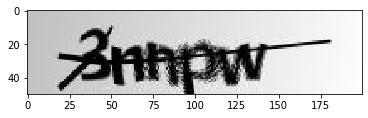

In [330]:
test_image_1='test1.png'
test_image_1=io.imread((test_image_1))
plt.imshow(test_image_1)

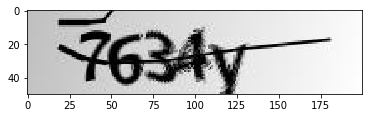

In [331]:
test_image_2='test2.png'
test_image_2=io.imread((test_image_2))
plt.imshow(test_image_2)

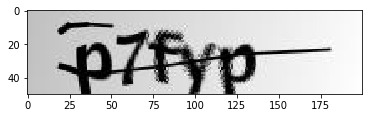

In [332]:
test_image_3='test3.png'
test_image_3=io.imread((test_image_3))
plt.imshow(test_image_3)

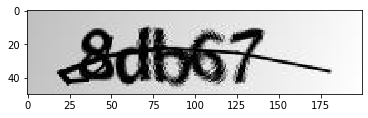

In [333]:
test_image_4='test4.png'
test_image_4=io.imread((test_image_4))
plt.imshow(test_image_4)

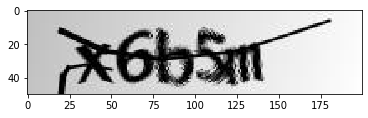

In [334]:
test_image_5='test5.png'
test_image_5=io.imread((test_image_5))
plt.imshow(test_image_5)

In [337]:
test_image_1='test1.png'
test_image_2='test2.png'
test_image_3='test3.png'
test_image_4='test4.png'
test_image_5='test5.png'
test_images=[test_image_1,test_image_2,test_image_3,test_image_4,test_image_5]

In [338]:
cropped_test_images=[]
for i in test_images:
    image=io.imread((i), as_gray=True)
    crop_test_image_1=image[0:50, 30:50]
    crop_test_image_2=image[0:50, 50:70]
    crop_test_image_3=image[0:50, 70:90]
    crop_test_image_4=image[0:50, 95:115]
    crop_test_image_5=image[0:50, 115:135]

    cropped_test_images.append(crop_test_image_1)
    cropped_test_images.append(crop_test_image_2)
    cropped_test_images.append(crop_test_image_3)
    cropped_test_images.append(crop_test_image_4)
    cropped_test_images.append(crop_test_image_5)

In [339]:
cropped_test_images_tensor=tf.convert_to_tensor(cropped_test_images)
cropped_test_images_tensor=np.array(cropped_test_images_tensor)

In [340]:
cropped_test_images_tensor=cropped_test_images_tensor.reshape((25, 50, 20,1))

In [341]:
yhat=model.predict(cropped_test_images_tensor)

In [342]:
yhat.shape

(25, 36)

In [349]:
d=[]
for i in yhat:
    d.append(np.argmax(i))


In [350]:
e=[]
for i in d:    
    if i == 2:
        e.append('2')
    if i == 3:
        e.append('3')
    if i == 4:
        e.append('4')
    if i == 5:
        e.append('5')
    if i == 6:
        e.append('6')
    if i == 7:
        e.append('7')
    if i == 8:
        e.append('8')
    if i == 10:
        e.append('b')
    if i == 11:
        e.append('c')
    if i == 12:
        e.append('d')
    if i == 13:
        e.append('e')
    if i == 14:
        e.append('f')
    if i == 15:
        e.append('g')
    if i == 16:
        e.append('m')
    if i == 17:
        e.append('n')
    if i == 18:
        e.append('p')
    if i == 19:
        e.append('w')
    if i == 0:
        e.append('x')
    if i == 1:
        e.append('y')

In [351]:
s=''
a=s.join(e)
test_label_1=a[:5]
test_label_2=a[5:10]
test_label_3=a[10:15]
test_label_4=a[15:20]
test_label_5=a[20:25]
print('The captcha text is')
print('Test Label 1:',test_label_1)
print('Test Label 2:',test_label_2)
print('Test Label 3:',test_label_3)
print('Test Label 4:',test_label_4)
print('Test Label 5:',test_label_5)

The captcha text is
Test Label 1: 3nnpw
Test Label 2: 763by
Test Label 3: p7fyp
Test Label 4: 8db67
Test Label 5: x6b5m
